# Guided Project #6
## Analyzing Star Wars Survey

In [87]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv('star_wars.csv', encoding="ISO-8859-1")
print(star_wars.shape)
star_wars.head()

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [88]:
# removing records with invalind RespondentID
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

In [89]:
# converting Yes/No columns to boolean type
bool_cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
             'Do you consider yourself to be a fan of the Star Wars film franchise?']

print('Values before conversion:')
for col in bool_cols:
    print(star_wars[col].value_counts(dropna=False))
    
bool_map = {
    'Yes':True,
    'No':False
}

for col in bool_cols:
    star_wars[col] = star_wars[col].map(bool_map)
 
print('Values after conversion:')
for col in bool_cols:
    print(star_wars[col].value_counts(dropna=False))

Values before conversion:
Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
Values after conversion:
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Cleaning movies seen columns

In [90]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [91]:
# That is how we can access the movie title
star_wars['Unnamed: 4'].value_counts().index[0]

'Star Wars: Episode II  Attack of the Clones'

In [92]:
# Movies seen columns
mov_cols = star_wars.columns[3:9]

# Columns renaming dictionary
mov_col_names = {}
i = 1

for col in mov_cols:
    mov_title = star_wars[col].value_counts().index[0]
    mov_map = {mov_title:True, np.NaN:False}
    # apply mapping to the column
    star_wars[col] = star_wars[col].map(mov_map)
    # save old and new columns name to the dictionary
    mov_col_names[col] = 'seen_'+str(i)
    i+=1
    
star_wars.rename(columns=mov_col_names, inplace=True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning ranking columns

In [93]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [94]:
rnk_cols = star_wars.columns[9:15]
rnk_col_names = {}
i = 1

for col in rnk_cols:
    rnk_col_names[col] = 'ranking_' + str(i)
    i+=1
    
star_wars.rename(columns=rnk_col_names, inplace=True)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


### Highest ranking movie

In [95]:
help(star_wars.mean)

Help on method mean in module pandas.core.frame:

mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return the mean of the values for the requested axis.
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
    skipna : bool, default True
        Exclude NA/null values when computing the result.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    **kwargs
        Additional keyword arguments to be passed to the function.
    
    Returns
    -------
    mean : Series or DataFrame (if level specified)



In [96]:
rnk_cols = star_wars.columns[9:15]
rnk_means = star_wars[rnk_cols].mean()
rnk_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

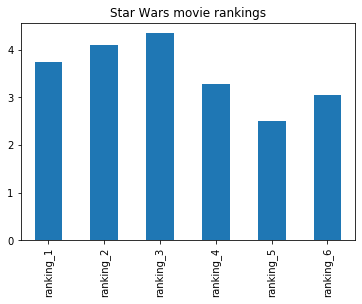

In [97]:
%matplotlib inline
rnk_means.plot(kind='bar', title='Star Wars movie rankings')

Part 5 seems to be the highest ranking movie

### Seen movies

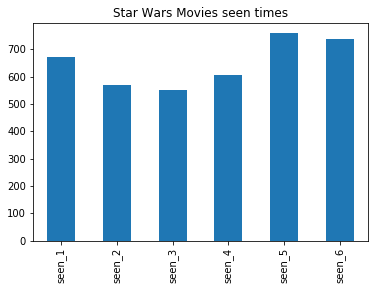

In [98]:
seen_cols = star_wars.columns[3:9]
seen = star_wars[seen_cols].sum()
seen.plot(kind='bar', title='Star Wars Movies seen times')

The chart seem to correlate with ranking chart a lot. The movies seen more times get higher rankings. Which makes sence

### Gender analysis
Let's build the same two charts for male and female respondents

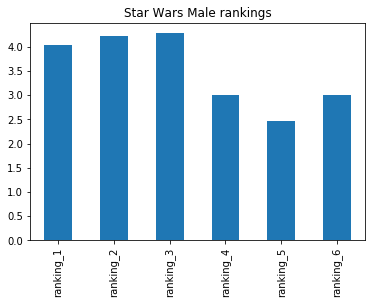

In [99]:
swm = star_wars[star_wars.Gender=='Male']
swf = star_wars[star_wars.Gender=='Female']

swm_rnks = swm[rnk_cols].mean()
swf_rnks = swf[rnk_cols].mean()

swm_rnks.plot(kind='bar', title='Star Wars Male rankings')

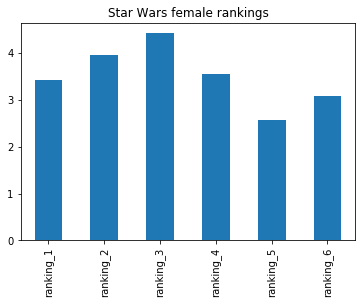

In [100]:
swf_rnks.plot(kind='bar', title='Star Wars female rankings')

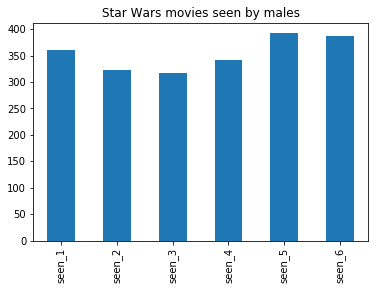

In [101]:
swm_seen = swm[seen_cols].sum()
swf_seen = swf[seen_cols].sum()
swm_seen.plot(kind='bar', title='Star Wars movies seen by males')

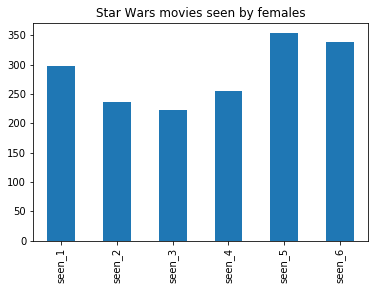

In [102]:
swf_seen.plot(kind='bar', title='Star Wars movies seen by females')

### Gender plots on a single multi-axed plot

[]

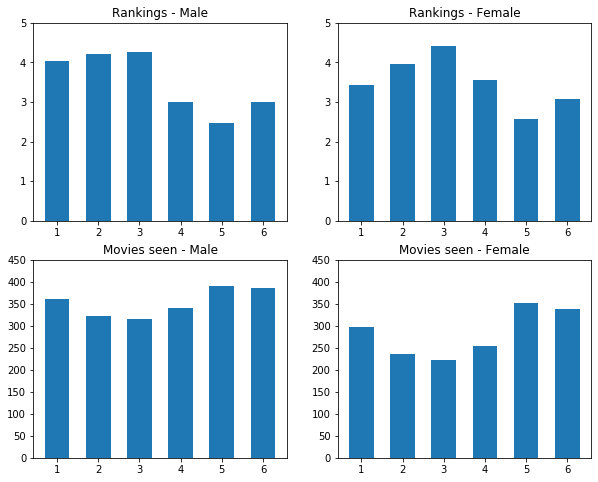

In [128]:
import matplotlib.pyplot as plt
from numpy import arange

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

bar_positions = arange(6) + 1
ax1.bar(bar_positions, swm_rnks, 0.6)
ax2.bar(bar_positions, swf_rnks, 0.6)
ax3.bar(bar_positions, swm_seen, 0.6)
ax4.bar(bar_positions, swf_seen, 0.6)

ax1.set_ylim(0,5)
ax2.set_ylim(0,5)
ax3.set_ylim(0,450)
ax4.set_ylim(0,450)

ax1.set_title('Rankings - Male')
ax2.set_title('Rankings - Female')
ax3.set_title('Movies seen - Male')
ax4.set_title('Movies seen - Female')

plt.plot()

In [121]:
dir(ax1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_mouseover_set',